# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from mlxtend.frequent_patterns import apriori, fpgrowth
import mlxtend
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

# Part a

In [2]:
df = pd.read_csv(".\datasets\diabetes.csv")
df

<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
C:\Users\Afrooz Sheikholeslam\AppData\Local\Temp\ipykernel_8292\1712808344.py:1: DeprecationWarning: invalid escape sequence \d
  df = pd.read_csv(".\datasets\diabetes.csv")


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.dropna(inplace=True)
df.shape

(768, 9)

# Part b

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>] AxesSubplot(0.125,0.657941;0.227941x0.222059)
Pregnancies
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>] AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>] AxesSubplot(0.125,0.657941;0.227941x0.222059)
BloodPressure
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>] AxesSubplot(0.125,0.657941;0.227941x0.222059)
SkinThickness
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>] AxesSubplot(0.125,0.657941;0.227941x0.222059)
Insulin
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>] AxesSubplot(0.125,0.657941;0.227941x0.222059)
BMI
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>] AxesSubplot(0.125,0.657941;0.227941x0.222059)
DiabetesPedigreeFunction
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>] AxesSubplot(0.125,0.657941;0.227941x0.222059)
Age
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>] AxesSubplot(0.125,0.657941;0.227941x0.222059)
Outcome


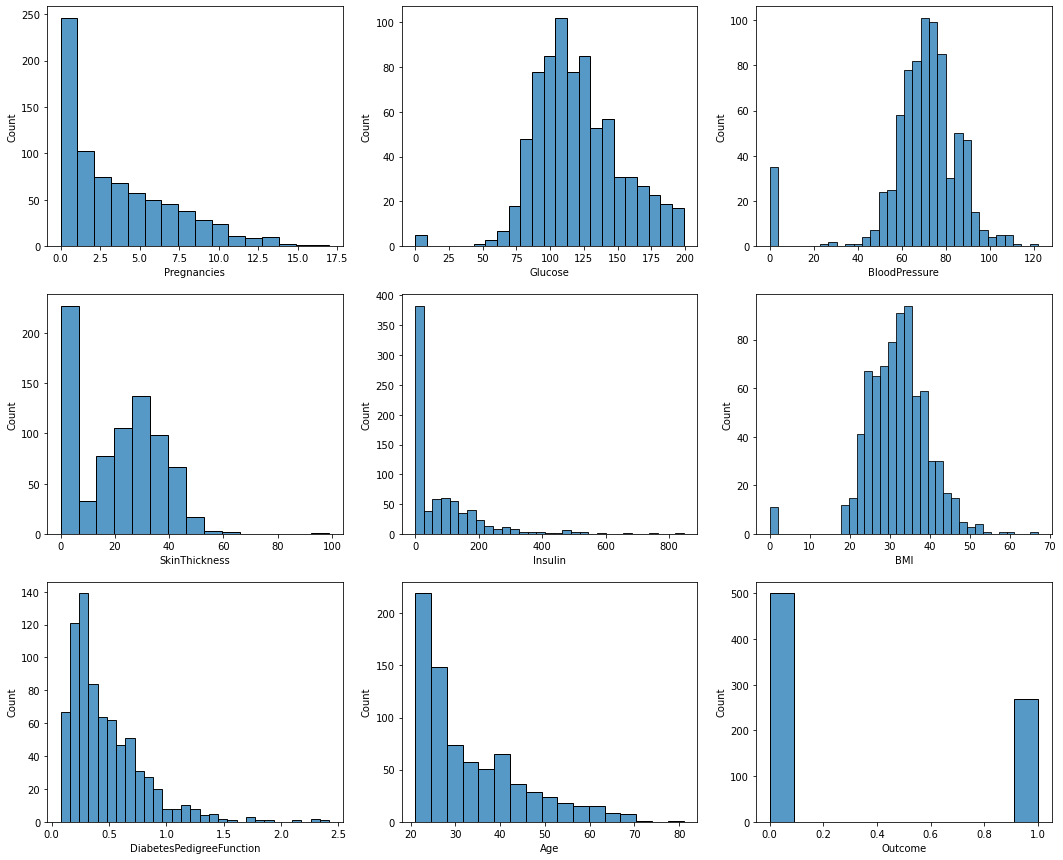

In [40]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

for i in range(3):
    for j in range(3):
        print(row, col)
        index = j+(3*i)
        print(df.columns[index])
        sns.histplot(data=df, x=df.columns[index], ax=ax[i, j])


# Part c

In [4]:
df['Age_binned'] = pd.qcut(df['Age'], 3)
df['BMI_binned'] = pd.qcut(df['BMI'], 3)
df.drop('Age', axis=1, inplace=True)
df.drop('BMI', axis=1, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,Age_binned,BMI_binned
0,6,148,72,35,0,0.627,1,"(36.0, 81.0]","(28.9, 34.733]"
1,1,85,66,29,0,0.351,0,"(25.0, 36.0]","(-0.001, 28.9]"
2,8,183,64,0,0,0.672,1,"(25.0, 36.0]","(-0.001, 28.9]"
3,1,89,66,23,94,0.167,0,"(20.999, 25.0]","(-0.001, 28.9]"
4,0,137,40,35,168,2.288,1,"(25.0, 36.0]","(34.733, 67.1]"


# Part d

In [5]:
df = pd.get_dummies(df[['Age_binned', 'BMI_binned', 'Outcome']], columns=['Age_binned', 'BMI_binned', 'Outcome'])
df.head()

,"Age_binned_(20.999, 25.0]","Age_binned_(25.0, 36.0]","Age_binned_(36.0, 81.0]","BMI_binned_(-0.001, 28.9]","BMI_binned_(28.9, 34.733]","BMI_binned_(34.733, 67.1]",Outcome_0,Outcome_1
0,0,0,1,0,1,0,0,1
1,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,1
3,1,0,0,1,0,0,1,0
4,0,1,0,0,0,1,0,1


# Part e

In [7]:
app_freq_itemsets = apriori(df, min_support=0.01, use_colnames=True)
app_freq_itemsets

c:\Users\Afrooz Sheikholeslam\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.347656,"(Age_binned_(20.999, 25.0])"
1,0.321615,"(Age_binned_(25.0, 36.0])"
2,0.330729,"(Age_binned_(36.0, 81.0])"
3,0.338542,"(BMI_binned_(-0.001, 28.9])"
4,0.328125,"(BMI_binned_(28.9, 34.733])"
5,0.333333,"(BMI_binned_(34.733, 67.1])"
6,0.651042,(Outcome_0)
7,0.348958,(Outcome_1)
8,0.154948,"(BMI_binned_(-0.001, 28.9], Age_binned_(20.999..."
9,0.098958,"(BMI_binned_(28.9, 34.733], Age_binned_(20.999..."


In [8]:
ap_rules = association_rules(app_freq_itemsets, metric="confidence", min_threshold=0.5)
ap_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Age_binned_(20.999, 25.0])",(Outcome_0),0.347656,0.651042,0.289062,0.831461,1.277124,0.062724,2.070486
1,"(Age_binned_(25.0, 36.0])",(Outcome_0),0.321615,0.651042,0.196615,0.611336,0.939012,-0.012770,0.897841
2,"(Age_binned_(36.0, 81.0])",(Outcome_0),0.330729,0.651042,0.165365,0.500000,0.768000,-0.049954,0.697917
3,"(Age_binned_(36.0, 81.0])",(Outcome_1),0.330729,0.348958,0.165365,0.500000,1.432836,0.049954,1.302083
4,"(BMI_binned_(-0.001, 28.9])",(Outcome_0),0.338542,0.651042,0.287760,0.850000,1.305600,0.067356,2.326389
5,"(BMI_binned_(28.9, 34.733])",(Outcome_0),0.328125,0.651042,0.188802,0.575397,0.883810,-0.024821,0.821846
6,"(BMI_binned_(34.733, 67.1])",(Outcome_0),0.333333,0.651042,0.174479,0.523438,0.804000,-0.042535,0.732240
7,"(BMI_binned_(-0.001, 28.9], Age_binned_(20.999...",(Outcome_0),0.154948,0.651042,0.149740,0.966387,1.484370,0.048862,10.381510
8,"(BMI_binned_(-0.001, 28.9], Outcome_0)","(Age_binned_(20.999, 25.0])",0.287760,0.347656,0.149740,0.520362,1.496772,0.049698,1.360075
9,"(Age_binned_(20.999, 25.0], Outcome_0)","(BMI_binned_(-0.001, 28.9])",0.289062,0.338542,0.149740,0.518018,1.530146,0.051880,1.372371


# Part f

In [9]:
fp_freq_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
fp_freq_itemsets

c:\Users\Afrooz Sheikholeslam\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.348958,(Outcome_1)
1,0.330729,"(Age_binned_(36.0, 81.0])"
2,0.328125,"(BMI_binned_(28.9, 34.733])"
3,0.651042,(Outcome_0)
4,0.338542,"(BMI_binned_(-0.001, 28.9])"
5,0.321615,"(Age_binned_(25.0, 36.0])"
6,0.347656,"(Age_binned_(20.999, 25.0])"
7,0.333333,"(BMI_binned_(34.733, 67.1])"
8,0.165365,"(Age_binned_(36.0, 81.0], Outcome_1)"
9,0.088542,"(Age_binned_(36.0, 81.0], BMI_binned_(-0.001, ..."


In [10]:
fp_rules = association_rules(fp_freq_itemsets, metric="confidence", min_threshold=0.5)
fp_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Age_binned_(36.0, 81.0])",(Outcome_1),0.330729,0.348958,0.165365,0.500000,1.432836,0.049954,1.302083
1,"(Age_binned_(36.0, 81.0])",(Outcome_0),0.330729,0.651042,0.165365,0.500000,0.768000,-0.049954,0.697917
2,"(BMI_binned_(-0.001, 28.9], Outcome_1)","(Age_binned_(36.0, 81.0])",0.050781,0.330729,0.026042,0.512821,1.550575,0.009247,1.373766
3,"(Age_binned_(36.0, 81.0], BMI_binned_(-0.001, ...",(Outcome_0),0.088542,0.651042,0.062500,0.705882,1.084235,0.004856,1.186458
4,"(Age_binned_(36.0, 81.0], BMI_binned_(34.733, ...",(Outcome_1),0.121094,0.348958,0.075521,0.623656,1.787193,0.033264,1.729911
5,"(BMI_binned_(28.9, 34.733])",(Outcome_0),0.328125,0.651042,0.188802,0.575397,0.883810,-0.024821,0.821846
6,"(Age_binned_(36.0, 81.0], BMI_binned_(28.9, 34...",(Outcome_1),0.121094,0.348958,0.063802,0.526882,1.509870,0.021545,1.376065
7,"(BMI_binned_(28.9, 34.733], Age_binned_(20.999...",(Outcome_0),0.098958,0.651042,0.079427,0.802632,1.232842,0.015001,1.768056
8,"(BMI_binned_(-0.001, 28.9])",(Outcome_0),0.338542,0.651042,0.287760,0.850000,1.305600,0.067356,2.326389
9,"(BMI_binned_(-0.001, 28.9], Age_binned_(20.999...",(Outcome_0),0.154948,0.651042,0.149740,0.966387,1.484370,0.048862,10.381510
